<font size="5">
 <div class="alert alert-block alert-info"><b>Master in Data Science - Iscte <b>
     </div>
</font> 
 
 
     
    
  <font size="5"> OEOD </font>
  
  
  
  <font size="3"> **Diana Aldea Mendes**, October 2023 </font>
  
   
  <font size="3"> *diana.mendes@iscte-iul.pt* </font> 
  
    
 
  
    
  <font color='blue'><font size="5"> <b>Week 6 - Gym-AnyTrading<b></font></font>


#########################################################

- More info here: https://github.com/AminHP/gym-anytrading/tree/master 
- *OpenAI Gym* environments for **reinforcement learning-based trading algorithms**.
- Trading algorithms are mostly implemented in two markets: FOREX and Stock.
- Three Gym environments: TradingEnv, ForexEnv, and StocksEnv.
    - TradingEnv is an abstract environment which is defined to support all kinds of trading environments. 
    - ForexEnv and StocksEnv are simply two environments that inherit and extend TradingEnv. 

# Instalation

In [14]:
#pip install gym-anytrading

In [15]:
#pip install stable_baselines3

## Example 1

In [2]:
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt

env = gym.make('forex-v0')
# env = gym.make('stocks-v0')

KeyboardInterrupt: 

In [17]:
# create environment with specific parameters
# mu = pd.read_csv("MU.csv")
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL

custom_env = gym.make('forex-v0',
    # df = mu
    df=FOREX_EURUSD_1H_ASK,
    window_size=10,
    frame_bound=(50, 100),
    unit_side='right'
)

In [1]:
# print information
print("env information:")
print("> shape:", env.unwrapped.shape)
print("> df.shape:", env.unwrapped.df.shape)
print("> prices.shape:", env.unwrapped.prices.shape)
print("> signal_features.shape:", env.unwrapped.signal_features.shape)
print("> max_possible_profit:", env.unwrapped.max_possible_profit())

print()
print("custom_env information:")
print("> shape:", custom_env.unwrapped.shape)
print("> df.shape:", custom_env.unwrapped.df.shape)
print("> prices.shape:", custom_env.unwrapped.prices.shape)
print("> signal_features.shape:", custom_env.unwrapped.signal_features.shape)
print("> max_possible_profit:", custom_env.unwrapped.max_possible_profit())

env information:


NameError: name 'env' is not defined

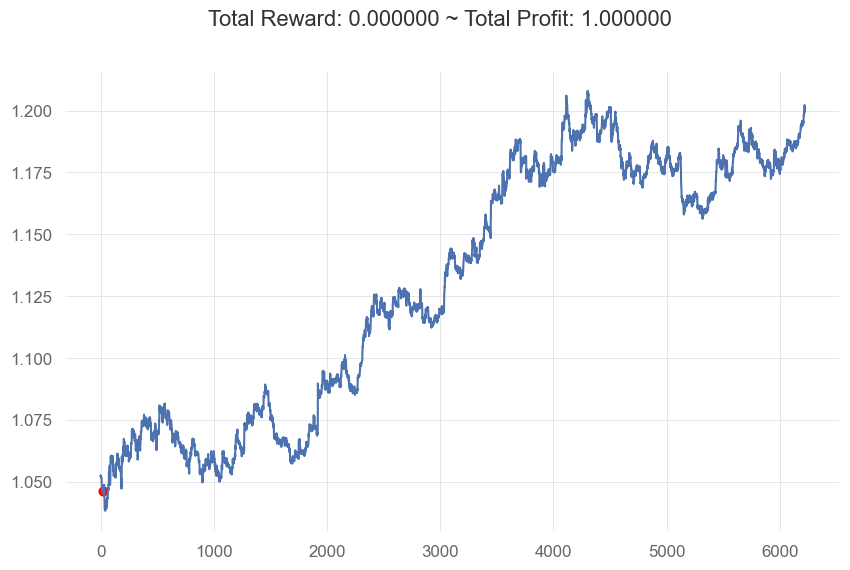

In [19]:
## plot environment
env.reset()
env.render()

# Short and Long positions are shown in red and green colors.

info: {'total_reward': 27.89616584777832, 'total_profit': 0.989812615901, 'position': <Positions.Long: 1>}


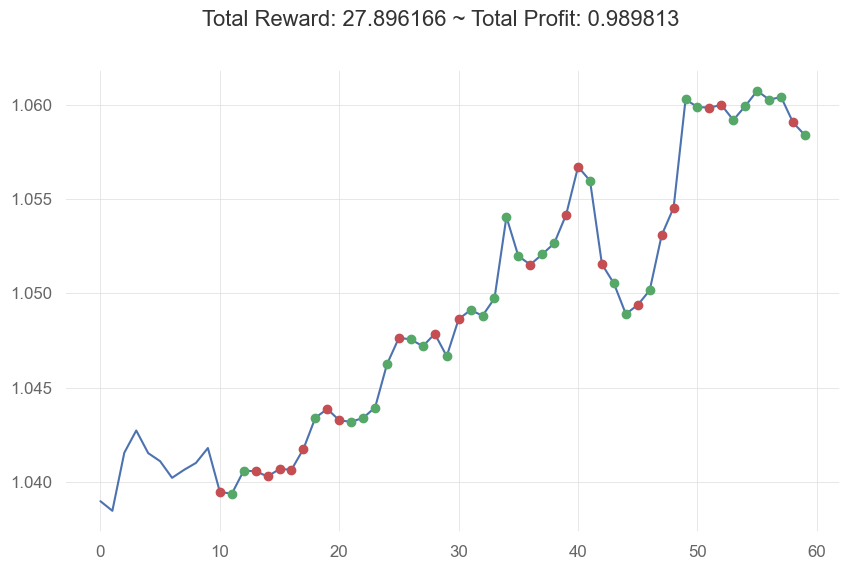

In [20]:
### complete example with update rule

from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL


env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset(seed=2023)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

In [21]:
# You can use render_all method to avoid rendering on each step and prevent time-wasting.
# As you see, the first 10 points (window_size=10) on the plot don't have a position. 
# Because they aren't involved in calculating reward, profit, etc. 
# They just display the first observations. So the environment's _start_tick and initial _last_trade_tick are 10 and 9.

## Example 2

### Imports

In [22]:
#!pip install quantstats

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gymnasium as gym
import gym_anytrading
from gym_anytrading.envs import Actions

from stable_baselines3 import A2C

import quantstats as qs

### Create Env

In [24]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 10
start_index = window_size
end_index = len(df)

env = gym.make(
    'stocks-v0',
    df=df,
    window_size=window_size,
    frame_bound=(start_index, end_index)
)

print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


### Train Env

In [25]:
env.reset(seed=2023)
model = A2C('MlpPolicy', env, verbose=0)
model.learn(total_timesteps=1_000)

### Test Env

In [26]:
action_stats = {Actions.Sell: 0, Actions.Buy: 0}

observation, info = env.reset(seed=2023)

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    action_stats[Actions(action)] += 1
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("action_stats:", action_stats)
print("info:", info)

action_stats: {<Actions.Sell: 0>: 1261, <Actions.Buy: 1>: 1063}
info: {'total_reward': 448.7478332519531, 'total_profit': 0.0005110888817534636, 'position': <Positions.Long: 1>}


### Plot Results

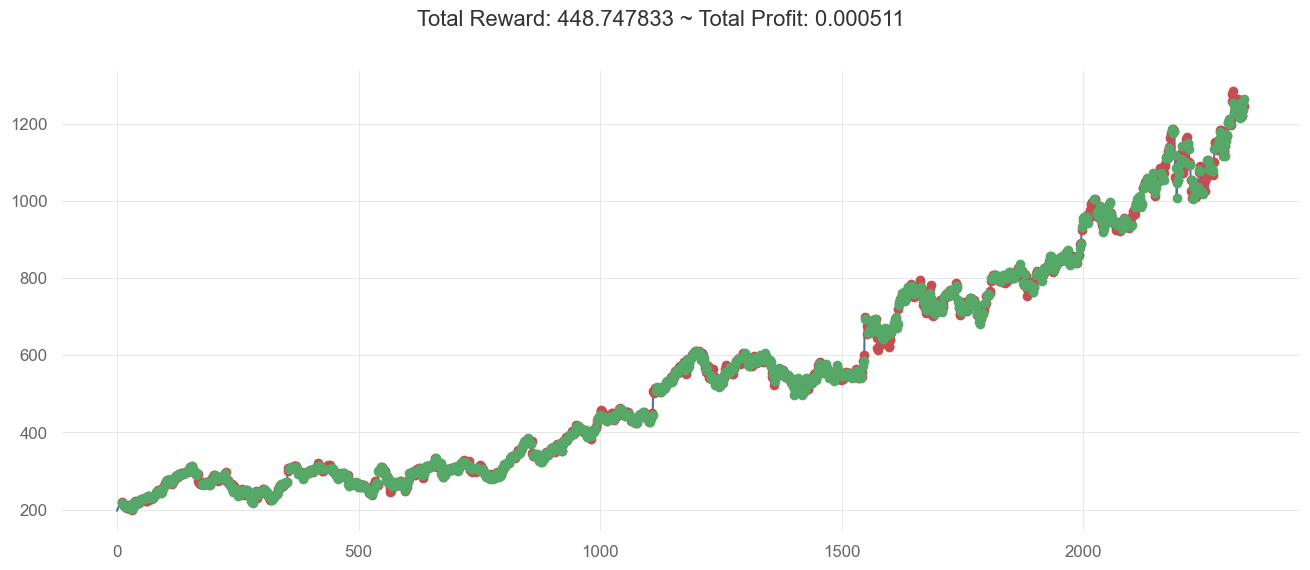

In [27]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

### Analysis Using `quantstats`

                           Strategy
-------------------------  ----------
Start Period               2009-06-10
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             25.0%

Cumulative Return          -99.95%
CAGR﹪                     -43.29%

Sharpe                     -4.59
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -4.22
Sortino                    -4.78
Smart Sortino              -4.39
Sortino/√2                 -3.38
Smart Sortino/√2           -3.11
Omega                      0.16

Max Drawdown               -99.95%
Longest DD Days            3360
Volatility (ann.)          17.54%
Calmar                     -0.43
Skew                       -1.7
Kurtosis                   20.21

Expected Daily %           -0.33%
Expected Monthly %         -6.6%
Expected Yearly %          -53.13%
Kelly Criterion            -106.02%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.14%
Expected Shortfall (cVaR)  -2.14%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-06-18,2018-08-28,2018-08-29,3360,-99.947753,-99.942149


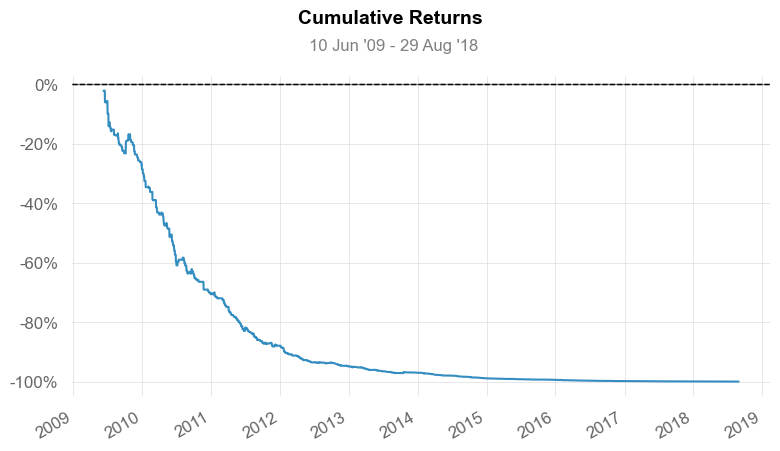

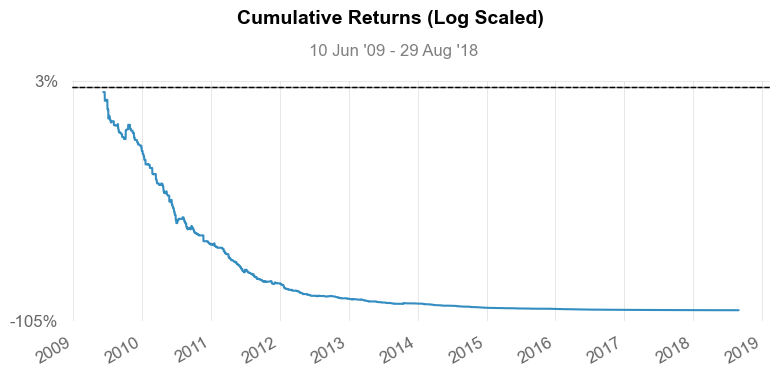

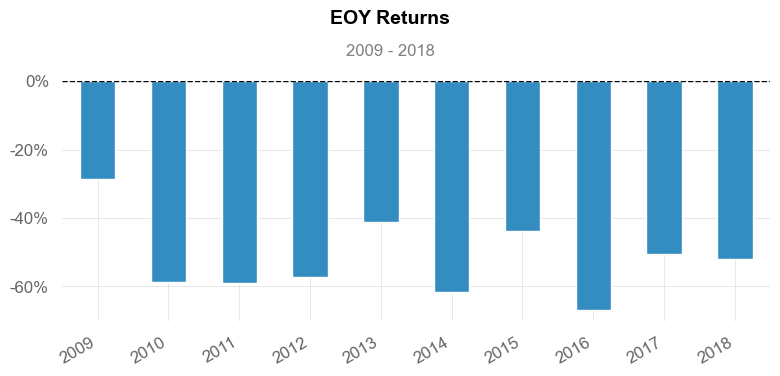

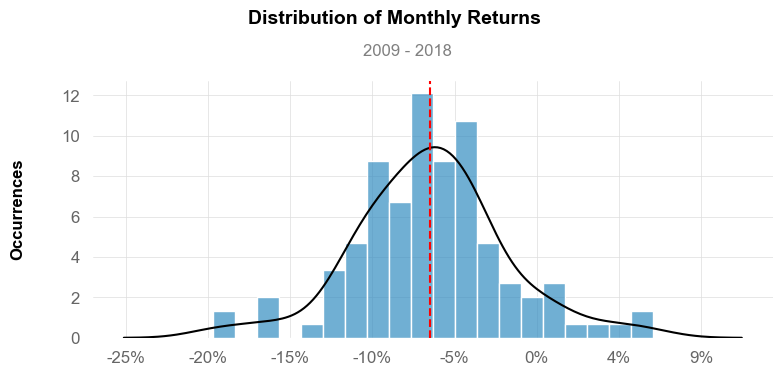

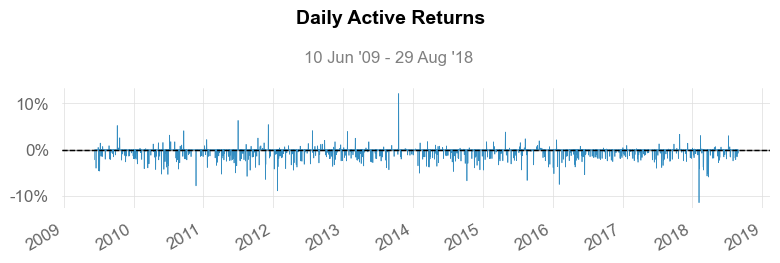

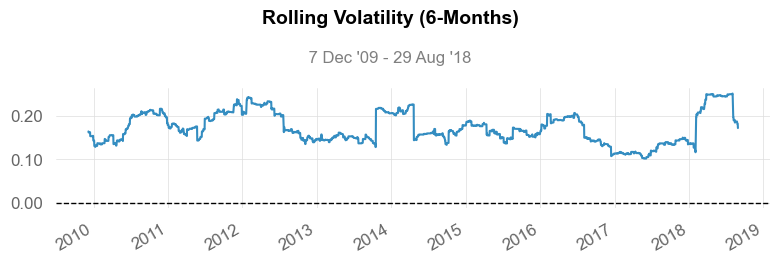

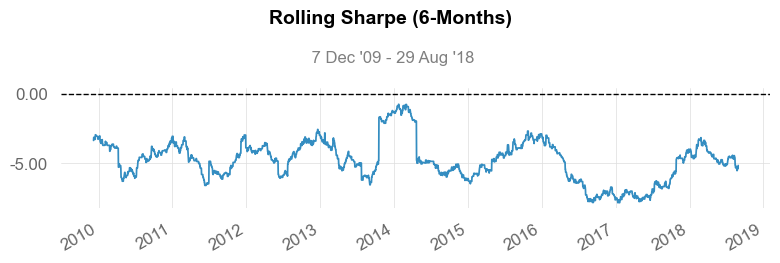

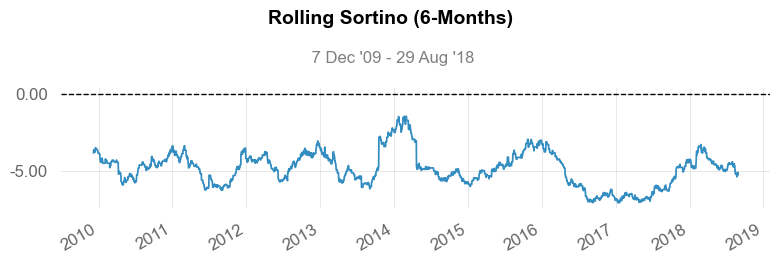

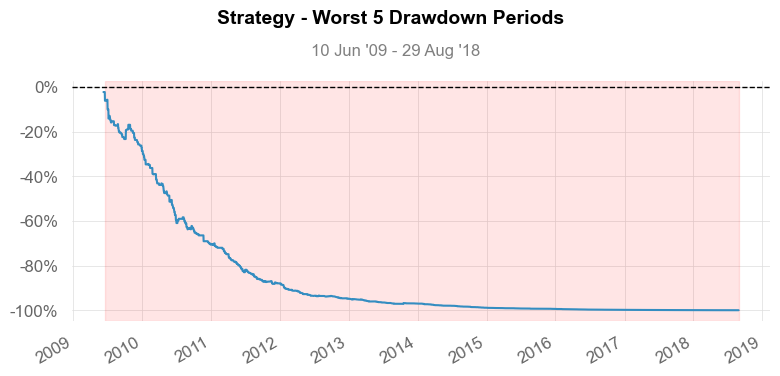

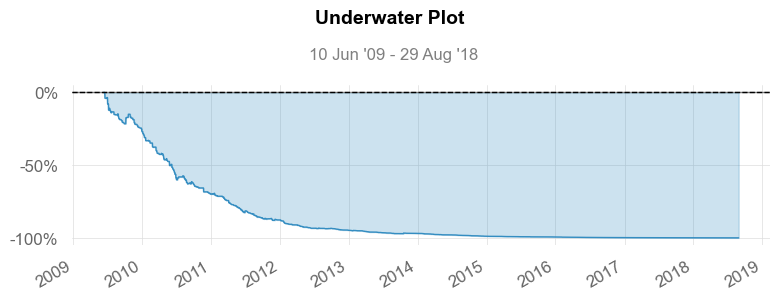

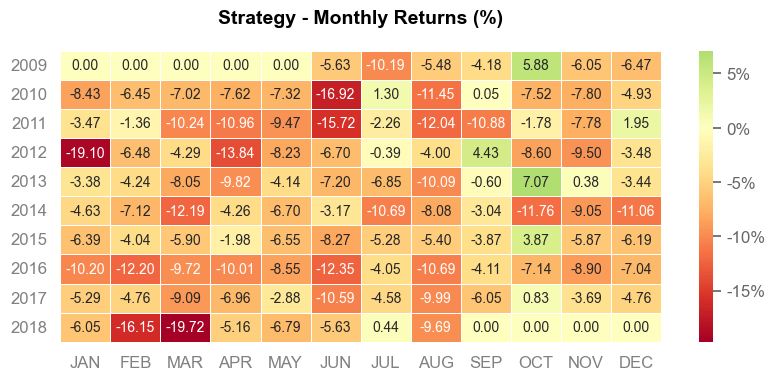

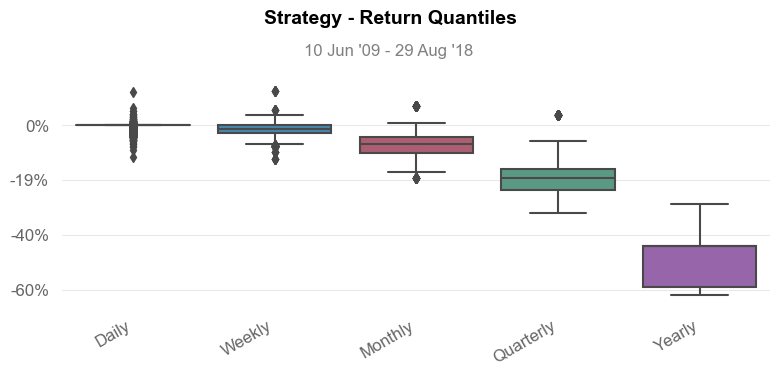

In [28]:
qs.extend_pandas()

net_worth = pd.Series(env.unwrapped.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='SB3_a2c_quantstats.html')